# 标签传播（LPA）算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import make_circles

## 读取圆圈数据


通过datasets得到圆圈的数据

In [2]:
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)

数据画图显示

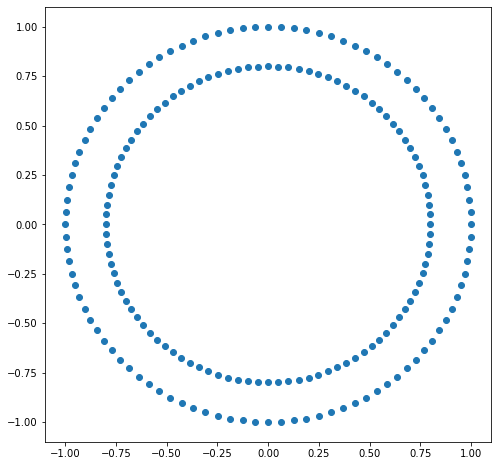

In [3]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1])

## 设定两个标签


给两个标签分别设置为内标签和外标签


这两个设定好的标签为初始值，以此为依据可以传播

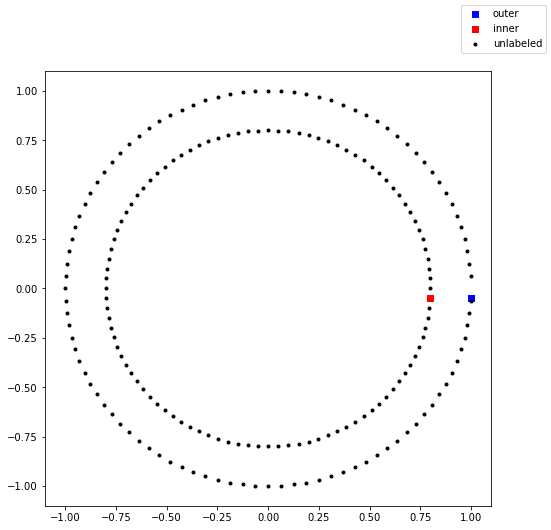

In [4]:
OUTER, INNER = 0, 1 # 设置两个常量
labels = np.full(n_samples, -1.0) # 根据数量设置一个数组，值全是-1.0，代表没有设置的数据
labels[0] = OUTER # 设置一个外部坐标
labels[-1] = INNER # 设置一个内部坐标

# 画一个图，黑色的点是没有标记的内容，红色的是内部的，蓝色的是外部的
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(
    X[labels == OUTER, 0],
    X[labels == INNER, 1],
    color="blue",
    marker="s",
    label="outer",
)
ax.scatter(
    X[labels == INNER, 0],
    X[labels == INNER, 1],
    color="red",
    marker="s",
    label="inner",
)
ax.scatter(
    X[labels == -1, 0],
    X[labels == -1, 1],
    color="black",
    marker=".",
    label="unlabeled",
)
fig.legend()

## 开始半监督机器学习


训练模型，并预测

In [5]:
label_spread = LabelSpreading(kernel="rbf", alpha=0.8)
label_spread.fit(X, labels)
output_labels = label_spread.transduction_
output_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

画图

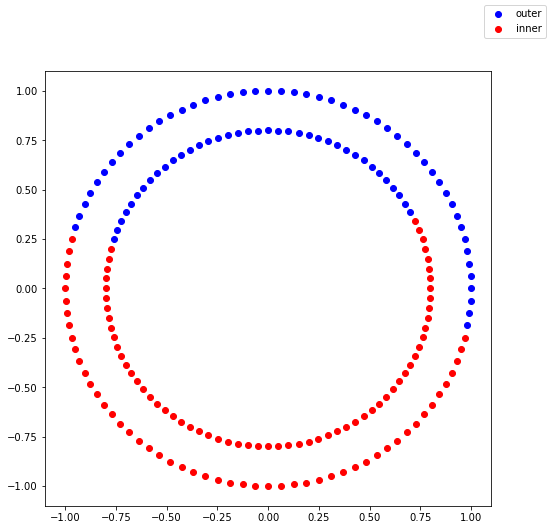

In [6]:
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == OUTER)[0]
inner_numbers = np.where(output_label_array == INNER)[0]

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(
    X[outer_numbers, 0],
    X[outer_numbers, 1],
    color="blue",
    label="outer",
)
ax.scatter(
    X[inner_numbers, 0],
    X[inner_numbers, 1],
    color="red",
    label="inner",
)
fig.legend()

效果并不是很好，这时候需要调整参数


### 修改核函数

In [7]:
# Learn with LabelSpreading
label_spread = LabelSpreading(kernel="knn", alpha=0.8)
label_spread.fit(X, labels)
output_labels = label_spread.transduction_
output_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

画图

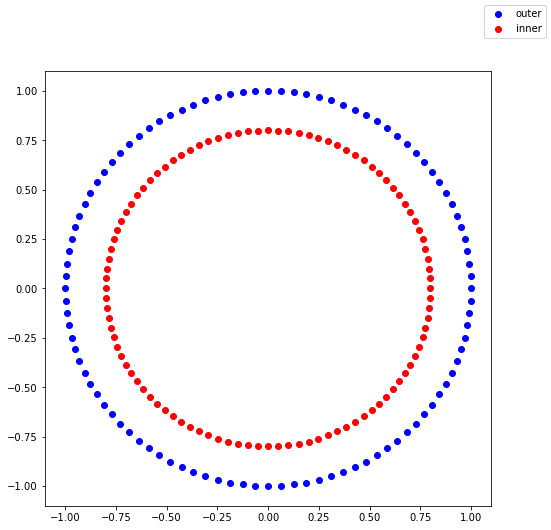

In [8]:
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == OUTER)[0]
inner_numbers = np.where(output_label_array == INNER)[0]

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(
    X[outer_numbers, 0],
    X[outer_numbers, 1],
    color="blue",
    label="outer",
)
ax.scatter(
    X[inner_numbers, 0],
    X[inner_numbers, 1],
    color="red",
    label="inner",
)
fig.legend()